# Summarize abundance results

In [10]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

In [11]:
dualipa_inputs = "../1_inputs"
dualipa_outputs = "../3_outputs"

## Count assayed genes and alleles

In [12]:
abun = pl.read_csv(f'{dualipa_outputs}/DUALIPA_median_zscore.csv', infer_schema_length=1000000).with_columns(
    pl.concat_str([pl.col("symbol"), pl.col("aa_change")], separator="_").alias("Variant")
).filter(~pl.col("zscore_log2").is_null())

num_alleles = len(abun.select("Variant").to_series().unique().to_list())
num_genes = len(abun.select("symbol").to_series().unique().to_list())

print(f"{num_alleles} variants across {num_genes} genes were assayed")

919 variants across 92 genes were assayed


## Investigate impact of log2 Z-score vs. fold-change z-score

The first set of results were z-scores computed based on raw GFP:mCherry ratios. However, the raw ratios are highly skewed and it makes more sense to do the analysis on log-transformed ratios (log2FC). Here we investigate the impact of using a raw ratio vs. a log2FC. 

In [14]:
pDEST_DUAL_allele_df = pd.read_csv(f'{dualipa_outputs}/DUALIPA_median_zscore.csv', low_memory=False)
sig_threshold = 1.96

clean_array = pDEST_DUAL_allele_df['zscore_median'].dropna().to_numpy()
percent_outside_bounds = ((clean_array > sig_threshold) | (clean_array < -sig_threshold)).mean() * 100
percent_high = (clean_array > sig_threshold).mean() * 100
percent_low = (clean_array < -sig_threshold).mean() * 100
print(f"Percentage of sig zscore values: {percent_outside_bounds:.2f}%")
print(f"Percentage of sig increase: {percent_high:.2f}%")
print(f"Percentage of sig decrease: {percent_low:.2f}%")

clean_array = pDEST_DUAL_allele_df['zscore_log2'].dropna().to_numpy()
percent_outside_bounds = ((clean_array > sig_threshold) | (clean_array < -sig_threshold)).mean() * 100
percent_high = (clean_array > sig_threshold).mean() * 100
percent_low = (clean_array < -sig_threshold).mean() * 100
print(f"Percentage of sig zscore_log2 values: {percent_outside_bounds:.2f}%")
print(f"Percentage of sig increase: {percent_high:.2f}%")
print(f"Percentage of sig decrease: {percent_low:.2f}%")

Percentage of sig zscore values: 24.18%
Percentage of sig increase: 2.25%
Percentage of sig decrease: 21.93%
Percentage of sig zscore_log2 values: 40.16%
Percentage of sig increase: 2.05%
Percentage of sig decrease: 38.11%


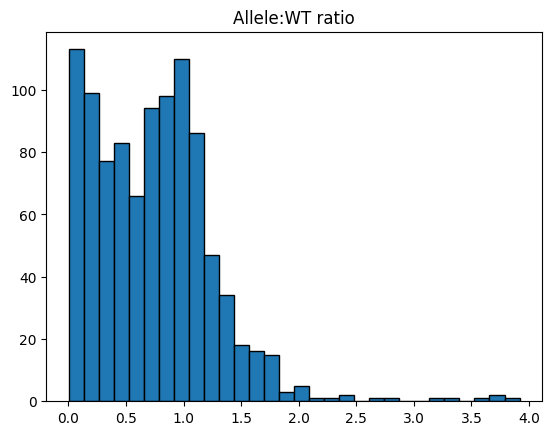

In [15]:
plt.hist(pDEST_DUAL_allele_df['allele_wt_ratio_median'], bins=30, edgecolor='black')
plt.title("Allele:WT ratio")
plt.show()

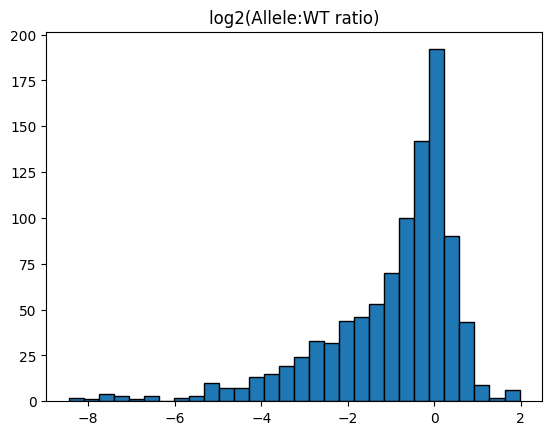

In [17]:
plt.hist(np.log2(pDEST_DUAL_allele_df['allele_wt_ratio_median']), bins=30, edgecolor='black')
plt.title("log2(Allele:WT ratio)")
plt.show()

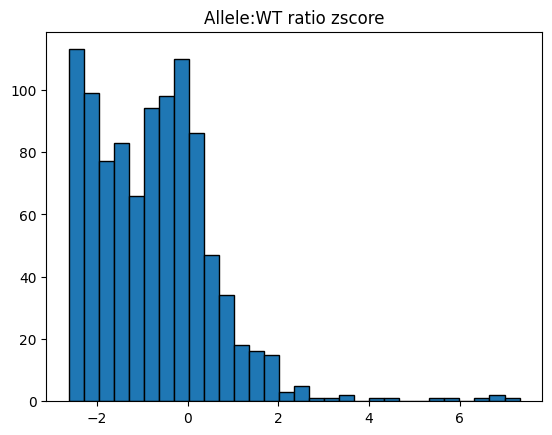

In [18]:
plt.hist(pDEST_DUAL_allele_df['zscore_median'], bins=30, edgecolor='black')
plt.title("Allele:WT ratio zscore")
plt.show()

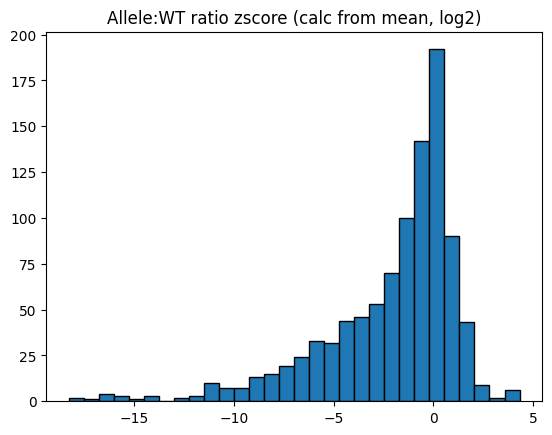

In [19]:
plt.hist(pDEST_DUAL_allele_df['zscore_log2'], bins=30, edgecolor='black')
plt.title("Allele:WT ratio zscore (calc from mean, log2)")
plt.show()